In [40]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

print(train_df.columns.values)

train_df.info()
print('_'*40)
test_df.info()

train_df.describe()

# train_df.describe(include=['0'])

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

g = sns.FacetGrid(train_df, col='Survived')
# Survived 기준으로 히스토그램 두개 만듦
g.map(plt.hist, 'Age', bins = 20)

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df,test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                                'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

guess_ages = np.zeros((2,3))
# 이게 무슨 함수지?
guess_ages

for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                               (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), \
                       'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()\
.sort_values(by='AgeBand', ascending=True)

for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']
train_df.head()

train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]
train_df.head()

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean()\
.sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()\
.sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
train_df.head()

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean()\
.sort_values(by='FareBand', ascending = True)

for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

test_df.head(10)

X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) *  100, 2)
acc_log

coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)



ModuleNotFoundError: No module named 'pandas'

In [ ]:
!pip install --upgrade scikit-learn

     ---------------------------------------- 7.5/7.5 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 40.1/40.1 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 4.6 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1, stratify = y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 9.2 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 6.1 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 3.3 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02):
    marker = ('s','x', 'o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),\
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=marker[idx],
                    label=cl,
                    edgecolor=None if idx==1 else 'black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor = 'none',
                    edgecolor = 'black',
                    alpha = 1.0,
                    linewidth = 1,
                    marker = 'o',
                    s = 100,
                    label = 'test set')

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

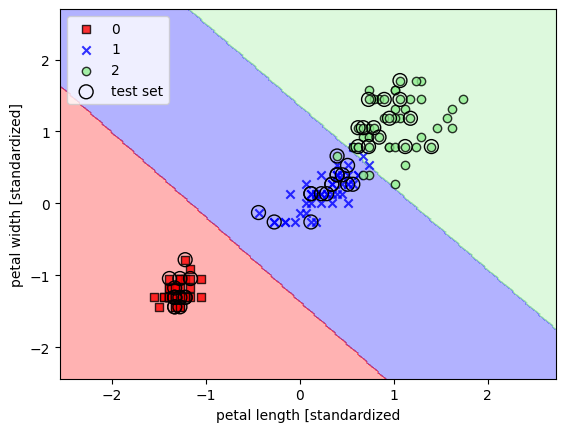

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_region(X_combined_std,
                    y_combined,
                    classifier=svm,
                    test_idx = range(105,150))
plt.xlabel('petal length [standardized')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout
plt.show()

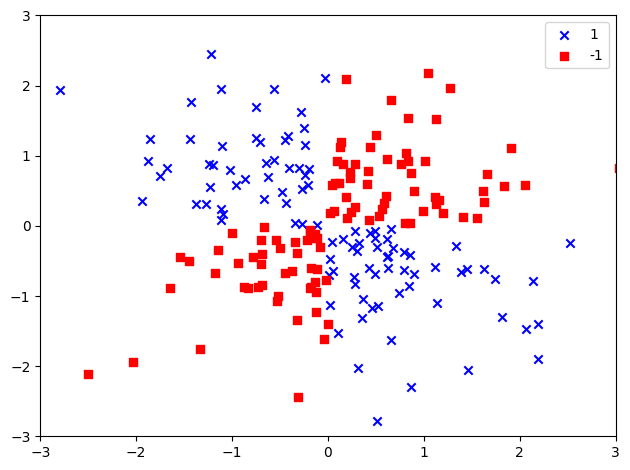

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                        X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c = 'b', marker='x',
            label = '1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c = 'r', marker = 's', label='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

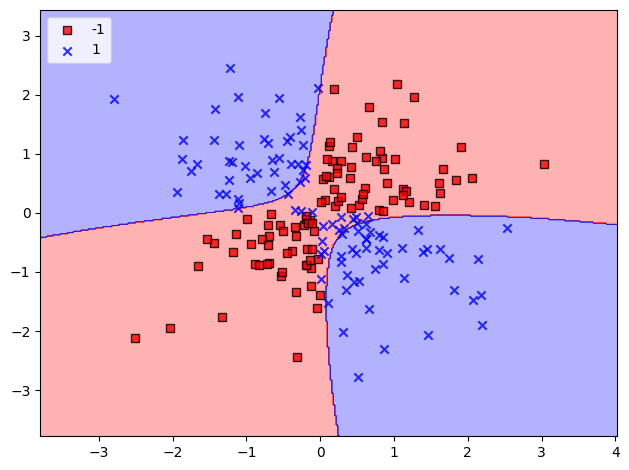

In [ ]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_region(X_xor, y_xor,
                    classifier = svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

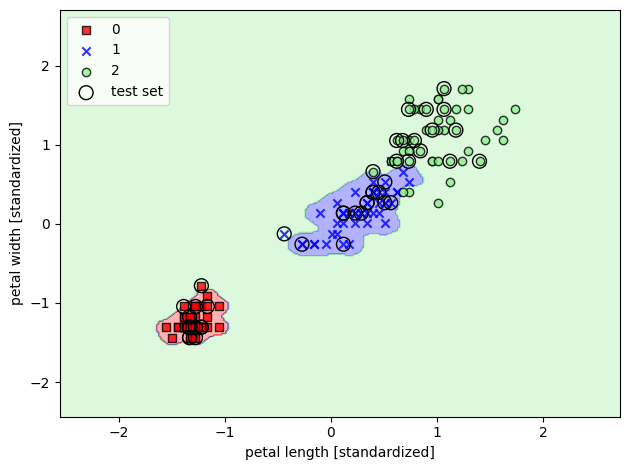

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_region(X_combined_std, y_combined,
                    classifier=svm, test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
!pip install pandas

     ---------------------------------------- 10.4/10.4 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 498.1/498.1 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
# 데이터 불러오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [43]:

# 데이터 preview
fish.head(10)


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [44]:

### 훈련 데이터와 테스트 데이터 나누기

# 어떤 종의 생선이 있을까?
# hint : unique()
fish['Species'].unique()


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [46]:

#1. 타깃을 제외한 나머지 컬럼을 입력 데이터로 만든다.

# input 데이터 생성
# hint : to_numpy()사용
fish_input= fish[fish.columns[1:]].to_numpy()
fish_input


array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [47]:

# 2. 타깃 데이터를 출력 데이터로 만든다.

# output 데이터 생성
fish_output= fish[fish.columns[0]].to_numpy()
fish_output


array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [50]:

# 3. 훈련 데이터 (input data)와 테스트 데이터 (output data) 나누기 

from sklearn.model_selection import train_test_split
# random_state=42 지정한다

train_input, test_input = train_test_split(fish_input, random_state=42, test_size=0.3, stratify=fish_output)
train_target, test_target = train_test_split(fish_output, random_state=42, test_size=0.3, stratify=fish_output)

train_input

array([[4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [1.10000e+02, 2.20000e+01, 2.35000e+01, 5.52250e+00, 3.99500e+00],
       [1.60000e+02, 2.25000e+01, 2.53000e+01, 7.03340e+00, 3.82030e+00],
       [6.00000e+01, 1.55000e+01, 1.74000e+01, 6.57720e+00, 2.31420e+00],
       [7.00000e+02, 3.30000e+01, 3.83000e+01, 1.48604e+01, 5.28540e+00],
       [4.00000e+01, 1.50000e+01, 1.60000e+01, 3.82400e+00, 2.43200e+00],
       [7.00000e+02, 3.30000e+01, 3.85000e+01, 1.49380e+01, 5.19750e+00],
       [2.50000e+02, 2.75000e+01, 2.89000e+01, 7.28280e+00, 4.56620e+00],
       [6.70000e+00, 9.80000e+00, 1.08000e+01, 1.73880e+00, 1.04760e+00],
       [2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [9.25000e+02, 3.95000e+01, 4.53000e+01, 1.87542e+01, 6.74970e+00],
       [5.40000e+02, 3.10000e+01, 3.40000e+01, 1.07440e+01, 6.56200e+00],
       [2.70000e+02, 2.65000e+01, 2.93000e+01, 8.14540e+00, 4.24850e+00],
       [1.55000e+03, 6.00000e+01, 6.40

In [49]:

### 훈련데이터와 테스트 데이터 세트를 표준화 전처리

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [52]:

### 확률적경사 하강법

from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요.
# Q1. 로지스틱 손실 함수 지정
# Q2. 에포크 횟수 10회 지정
# random_state=42로 지정한다 -> ??
sc = SGDClassifier(loss = 'log_loss', max_iter=10)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.7297297297297297
0.5833333333333334


C:\Users\YHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [54]:

#1. 10회의 결과값이 별로 좋지 않습니다. 더 훈련 시켜볼까요?

sc = SGDClassifier(loss = 'log_loss', max_iter=100)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.8558558558558559
0.6875


In [63]:

###  에포크와 과대/과소적합

import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

# 300번의 에포크 동안 훈련을 반복하여 진행해보기 
# * 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score,test_score 리스트에 추가

for i in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes) # partial_fit은 생각지도 못했네
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


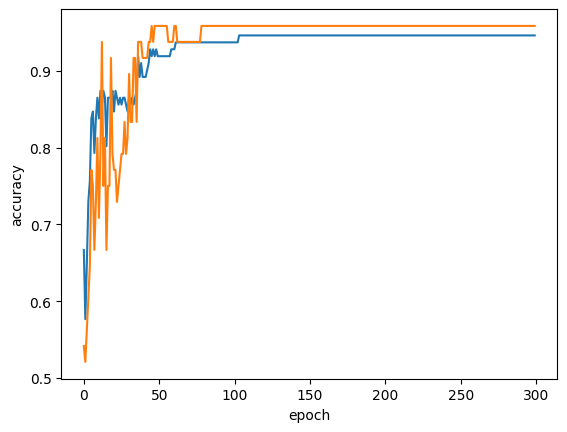

In [64]:

# 시각화

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [65]:

# mission
# * SGDClassifier의 반복 횟수를 100에 맞추고 다시 훈련시키기
# * 최종적으로 훈련 세트와 테스트 세트 점수 출력하기

sc = SGDClassifier(loss = 'log_loss', max_iter=100)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.8378378378378378
0.6666666666666666
